In [98]:
import pandas as pd
from pathlib import Path
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import json

In [99]:
df_rent_data="C:\\Users\\enmwa\\OneDrive\\seattle_rental_trends.csv"


#df1 = pd.read_csv(df_rent_data1)
df_rent = pd.read_csv(df_rent_data)


In [100]:
print(df_rent)

    Zipcode  1/31/2019  2/28/2019  3/31/2019  4/30/2019  5/31/2019  6/30/2019  \
0   98105.0     1889.0     1914.0     1967.0     1981.0     1977.0     1988.0   
1   98115.0     1804.0     1788.0     1816.0     1836.0     1864.0     1863.0   
2   98103.0     1783.0     1794.0     1802.0     1813.0     1823.0     1841.0   
3   98133.0     1456.0     1454.0     1463.0     1481.0     1507.0     1508.0   
4   98118.0     1415.0     1442.0     1429.0     1470.0     1488.0     1508.0   
5   98125.0     1570.0     1578.0     1563.0     1569.0     1574.0     1598.0   
6   98122.0     1823.0     1841.0     1856.0     1851.0     1855.0     1872.0   
7   98117.0     1695.0     1705.0     1733.0     1749.0     1765.0     1793.0   
8   98112.0     2009.0     2031.0     2057.0     2077.0     2093.0     2106.0   
9   98119.0     1762.0     1772.0     1782.0     1826.0     1840.0     1845.0   
10  98126.0     1678.0     1689.0     1687.0     1690.0     1672.0     1687.0   
11  98199.0     1998.0     2

In [101]:
df_rent.columns

Index(['Zipcode', '1/31/2019', '2/28/2019', '3/31/2019', '4/30/2019',
       '5/31/2019', '6/30/2019', '7/31/2019', '8/31/2019', '9/30/2019',
       '10/31/2019', '11/30/2019', '12/31/2019', 'TOTAL_RENTALS_2019',
       'AVR_2019', '1/31/2020', '2/29/2020', '3/31/2020', '4/30/2020',
       '5/31/2020', '6/30/2020', '7/31/2020', '8/31/2020', '9/30/2020',
       '10/31/2020', '11/30/2020', '12/31/2020', 'TOTAL_RENTALS_2020',
       'AVR_2020', '1/31/2021', '2/28/2021', '3/31/2021', '4/30/2021',
       '5/31/2021', '6/30/2021', '7/31/2021', '8/31/2021', '9/30/2021',
       '10/31/2021', '11/30/2021', '12/31/2021', 'TOTAL_RENTALS_2021',
       'AVR_2021', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022',
       '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022',
       '10/31/2022', '11/30/2022', '12/31/2022', 'TOTAL_RENTALS_2022',
       'AVR_2022', '1/31/2023', '2/28/2023', '3/31/2023', '4/30/2023',
       '5/31/2023', '6/30/2023', '7/31/2023', '8/31/2023', '9/30/2023',
  

In [102]:
df_rent.head()

,Zipcode,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,...,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,TOTAL_RENTAL_2023,AVR_2023
0,98105.0,1889.0,1914.0,1967.0,1981.0,1977.0,1988.0,2007.0,2015.0,2002.0,...,2286.0,2316.0,2340.0,2357.0,2351.0,2328.0,2298.0,2305.0,27566.0,2297.0
1,98115.0,1804.0,1788.0,1816.0,1836.0,1864.0,1863.0,1869.0,1882.0,1892.0,...,2182.0,2200.0,2218.0,2224.0,2233.0,2217.0,2211.0,2191.0,26306.0,2192.0
2,98103.0,1783.0,1794.0,1802.0,1813.0,1823.0,1841.0,1855.0,1871.0,1868.0,...,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,24624.0,2052.0
3,98133.0,1456.0,1454.0,1463.0,1481.0,1507.0,1508.0,1499.0,1503.0,1527.0,...,1800.0,1813.0,1825.0,1847.0,1837.0,1819.0,1817.0,1808.0,21790.0,1816.0
4,98118.0,1415.0,1442.0,1429.0,1470.0,1488.0,1508.0,1500.0,1502.0,1522.0,...,1739.0,1745.0,1748.0,1747.0,1750.0,1747.0,1737.0,1761.0,20989.0,1749.0


In [103]:
df_rent = df_rent.loc[~df_rent['Zipcode'].isnull(), :]
df_rent.head()

,Zipcode,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,...,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,TOTAL_RENTAL_2023,AVR_2023
0,98105.0,1889.0,1914.0,1967.0,1981.0,1977.0,1988.0,2007.0,2015.0,2002.0,...,2286.0,2316.0,2340.0,2357.0,2351.0,2328.0,2298.0,2305.0,27566.0,2297.0
1,98115.0,1804.0,1788.0,1816.0,1836.0,1864.0,1863.0,1869.0,1882.0,1892.0,...,2182.0,2200.0,2218.0,2224.0,2233.0,2217.0,2211.0,2191.0,26306.0,2192.0
2,98103.0,1783.0,1794.0,1802.0,1813.0,1823.0,1841.0,1855.0,1871.0,1868.0,...,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,24624.0,2052.0
3,98133.0,1456.0,1454.0,1463.0,1481.0,1507.0,1508.0,1499.0,1503.0,1527.0,...,1800.0,1813.0,1825.0,1847.0,1837.0,1819.0,1817.0,1808.0,21790.0,1816.0
4,98118.0,1415.0,1442.0,1429.0,1470.0,1488.0,1508.0,1500.0,1502.0,1522.0,...,1739.0,1745.0,1748.0,1747.0,1750.0,1747.0,1737.0,1761.0,20989.0,1749.0


In [104]:
df_rent['Zipcode'] = df_rent['Zipcode'].astype('int')

In [105]:
df_rent = df_rent.set_index('Zipcode')
df_rent.head()

,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,...,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,TOTAL_RENTAL_2023,AVR_2023
Zipcode,,,,,,,,,,,,,,,,,,,,,
98105,1889.0,1914.0,1967.0,1981.0,1977.0,1988.0,2007.0,2015.0,2002.0,1987.0,...,2286.0,2316.0,2340.0,2357.0,2351.0,2328.0,2298.0,2305.0,27566.0,2297.0
98115,1804.0,1788.0,1816.0,1836.0,1864.0,1863.0,1869.0,1882.0,1892.0,1875.0,...,2182.0,2200.0,2218.0,2224.0,2233.0,2217.0,2211.0,2191.0,26306.0,2192.0
98103,1783.0,1794.0,1802.0,1813.0,1823.0,1841.0,1855.0,1871.0,1868.0,1861.0,...,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,2052.0,24624.0,2052.0
98133,1456.0,1454.0,1463.0,1481.0,1507.0,1508.0,1499.0,1503.0,1527.0,1534.0,...,1800.0,1813.0,1825.0,1847.0,1837.0,1819.0,1817.0,1808.0,21790.0,1816.0
98118,1415.0,1442.0,1429.0,1470.0,1488.0,1508.0,1500.0,1502.0,1522.0,1510.0,...,1739.0,1745.0,1748.0,1747.0,1750.0,1747.0,1737.0,1761.0,20989.0,1749.0


In [106]:
df2 = df_rent.copy()
df2 = df2.loc[:,['TOTAL_RENTALS_2019',
        'TOTAL_RENTALS_2020',
         'TOTAL_RENTALS_2021',
         'TOTAL_RENTALS_2022',
       'TOTAL_RENTAL_2023',
       ]]
df2.head()

,TOTAL_RENTALS_2019,TOTAL_RENTALS_2020,TOTAL_RENTALS_2021,TOTAL_RENTALS_2022,TOTAL_RENTAL_2023
Zipcode,,,,,
98105,23647.0,23587.0,24067.0,26933.0,27566.0
98115,22239.0,22624.0,23125.0,25697.0,26306.0
98103,22021.0,22406.0,22534.0,24752.0,24624.0
98133,17973.0,18584.0,19008.0,21169.0,21790.0
98118,17788.0,18070.0,18458.0,20425.0,20989.0


In [107]:
df3 = df2.T
df3

Zipcode,98105,98115,98103,98133,98118,98125,98122,98117,98112,98119,98126,98199,98102,98121,98136,98101,98104
TOTAL_RENTALS_2019,23647.0,22239.0,22021.0,17973.0,17788.0,19125.0,22524.0,21160.0,24852.0,21874.0,20425.0,24635.0,21927.0,29312.0,22666.0,28333.0,22596.0
TOTAL_RENTALS_2020,23587.0,22624.0,22406.0,18584.0,18070.0,19607.0,22187.0,21753.0,25280.0,21742.0,20244.0,25489.0,21595.0,28343.0,23147.0,28075.0,21807.0
TOTAL_RENTALS_2021,24067.0,23125.0,22534.0,19008.0,18458.0,20037.0,21838.0,22404.0,25521.0,21717.0,20243.0,26340.0,21058.0,28283.0,23743.0,27876.0,21096.0
TOTAL_RENTALS_2022,26933.0,25697.0,24752.0,21169.0,20425.0,22591.0,24310.0,24834.0,27970.0,23970.0,22677.0,29055.0,23336.0,30163.0,26314.0,29877.0,23208.0
TOTAL_RENTAL_2023,27566.0,26306.0,24624.0,21790.0,20989.0,23190.0,24387.0,25386.0,28521.0,24031.0,23775.0,29338.0,23495.0,29593.0,27798.0,29399.0,23371.0


In [119]:

#df3_sorted= df3.sort_values(by=['98105', '98115', '98103', '98133', '98118', '98125', '98122', '98117', '98112', '98119', '98126', '98199', '98102', '98121', '98136', '98101', '98104'], ascending=True)



In [113]:
print(df3.columns)


Index([98105, 98115, 98103, 98133, 98118, 98125, 98122, 98117, 98112, 98119,
       98126, 98199, 98102, 98121, 98136, 98101, 98104],
      dtype='int32', name='Zipcode')


<Figure size 3000x2000 with 0 Axes>

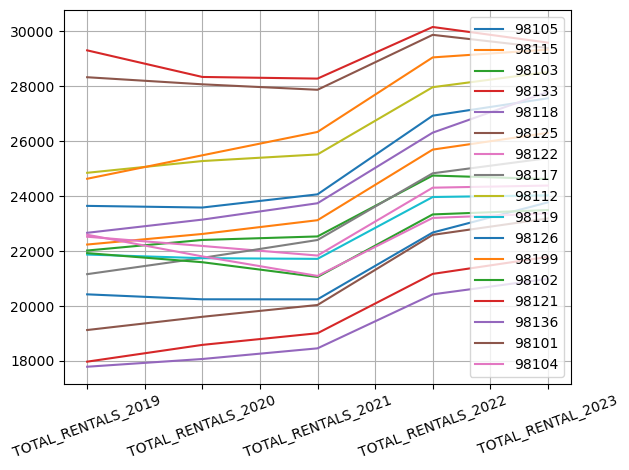

In [130]:
import matplotlib.pyplot as plt

# Define x-axis data
#x_axis_data = df_rent.columns

# Define specific columns to plot as y-axis data
y_axis_data = ['TOTAL_RENTALS_2019', 'AVR_2019', 'TOTAL_RENTALS_2020', 'AVR_2020', 'TOTAL_RENTALS_2021', 'AVR_2021', 'TOTAL_RENTALS_2022', 'AVR_2022', 'TOTAL_RENTAL_2023', 'AVR_2023']

# # Plotting
plt.figure(figsize=(30,20 ))

plot = df3.plot()

# for index, row in df2.iterrows():
# #     # Extract y-axis data for the current Zipcode
# #     y_values = df_rent.loc[Zipcode, y_axis_data]
#       y_values = row
#       print(row)
# #     # Ensure that x_axis_data and y_values have the same length
# #     if len(x_axis_data) != len(y_values):
# #         continue  # Skip plotting if dimensions don't match
    
# #     # Plot the line for the current Zipcode with a non-underscore label
#      plt.plot(x_axis_data, y_values, label=str(Zipcode))  # Ensure Zipcode is converted to string

# # Add labels and legend
# plt.xlabel('Annual Trends')
# plt.ylabel('Value')
# plt.title('Seattle Rental Data')
plt.legend()
# # Rotate x-axis labels for better visibility
plt.xticks(rotation=20)
# # Show the plot
plt.grid(True)
plt.tight_layout()
# plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TOTAL_RENTALS_2019'),
  Text(1, 0, 'TOTAL_RENTALS_2020'),
  Text(2, 0, 'TOTAL_RENTALS_2021'),
  Text(3, 0, 'TOTAL_RENTALS_2022'),
  Text(4, 0, 'TOTAL_RENTAL_2023')])

<Figure size 3000x9000 with 0 Axes>

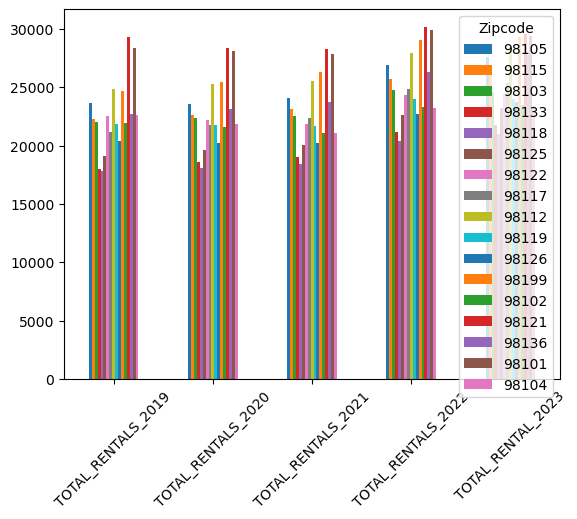

In [132]:
import matplotlib.pyplot as plt

# Define x-axis data
#x_axis_data = df_rent.columns

# Define specific columns to plot as y-axis data
y_axis_data = ['TOTAL_RENTALS_2019', 'AVR_2019', 'TOTAL_RENTALS_2020', 'AVR_2020', 'TOTAL_RENTALS_2021', 'AVR_2021', 'TOTAL_RENTALS_2022', 'AVR_2022', 'TOTAL_RENTAL_2023', 'AVR_2023']

# # Plotting
plt.figure(figsize=(30, 90))

plot = df3.plot(kind='bar')

# for index, row in df2.iterrows():
# #     # Extract y-axis data for the current Zipcode
# #     y_values = df_rent.loc[Zipcode, y_axis_data]
#       y_values = row
#       print(row)
# #     # Ensure that x_axis_data and y_values have the same length
# #     if len(x_axis_data) != len(y_values):
# #         continue  # Skip plotting if dimensions don't match
    
# #     # Plot the line for the current Zipcode with a non-underscore label
#      plt.plot(x_axis_data, y_values, label=str(Zipcode))  # Ensure Zipcode is converted to string

# # Add labels and legend
# plt.xlabel('Annual Trends')
# plt.ylabel('Value')
# plt.title('Seattle Rental Data')
# plt.legend()
# # Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

In [ ]:
df2 = df_rent.copy()
df2 = df2.loc[:,['TOTAL_RENTALS_2019',
        'TOTAL_RENTALS_2020',
         'TOTAL_RENTALS_2021',
         'TOTAL_RENTALS_2022',
       'TOTAL_RENTAL_2023',
       ]]
df2.head()

In [89]:


df2 = df_rent.copy()
df2 = df2.loc[:,['AVR_2019','AVR_2020','AVR_2021','AVR_2022','AVR_2023'
       ]]
       
df2.head()
       
       




,AVR_2019,AVR_2020,AVR_2021,AVR_2022,AVR_2023
Zipcode,,,,,
98105,1971.0,1966.0,2006.0,2244.0,2297.0
98115,1853.0,1885.0,1927.0,2141.0,2192.0
98103,3388.0,1867.0,1878.0,2063.0,2052.0
98133,1498.0,1549.0,1584.0,1764.0,1816.0
98118,1482.0,1506.0,1538.0,1702.0,1749.0


In [90]:
df4 = df2.T
df4

Zipcode,98105,98115,98103,98133,98118,98125,98122,98117,98112,98119,98126,98199,98102,98121,98136,98101,98104
AVR_2019,1971.0,1853.0,3388.0,1498.0,1482.0,2942.0,1877.0,1763.0,3823.0,1823.0,1702.0,3790.0,1827.0,2443.0,1889.0,2361.0,1883.0
AVR_2020,1966.0,1885.0,1867.0,1549.0,1506.0,1634.0,1849.0,1813.0,2107.0,1812.0,1687.0,2124.0,1800.0,2362.0,1929.0,2340.0,1817.0
AVR_2021,2006.0,1927.0,1878.0,1584.0,1538.0,1670.0,1820.0,1867.0,2127.0,1810.0,1687.0,2195.0,1755.0,2357.0,1979.0,2323.0,1758.0
AVR_2022,2244.0,2141.0,2063.0,1764.0,1702.0,1883.0,2026.0,2070.0,2331.0,1998.0,1890.0,2421.0,1945.0,2514.0,2193.0,2490.0,1934.0
AVR_2023,2297.0,2192.0,2052.0,1816.0,1749.0,1933.0,2032.0,2116.0,2377.0,2003.0,1981.0,2445.0,1958.0,2466.0,2317.0,2450.0,1948.0


In [ ]:
#sorted_df = df.sort_values(by=['column1', 'column2'], ascending=True)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'AVR_2019'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'AVR_2020'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'AVR_2021'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'AVR_2022'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'AVR_2023'),
  Text(4.5, 0, '')])

<Figure size 3000x1200 with 0 Axes>

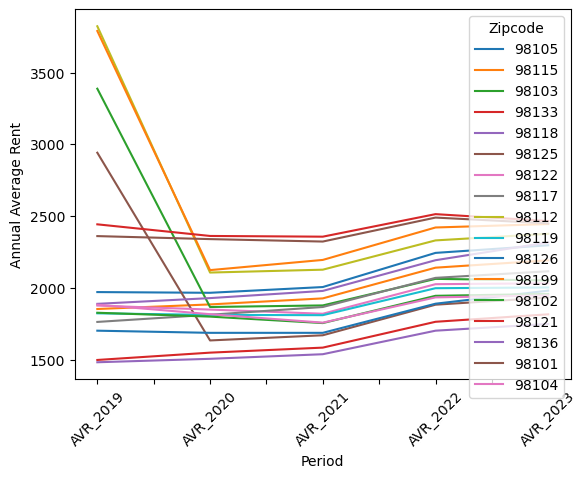

In [133]:
import matplotlib.pyplot as plt

# Define x-axis data
#x_axis_data = df_rent.columns

# Define specific columns to plot as y-axis data
y_axis_data = ['TOTAL_RENTALS_2019', 'AVR_2019', 'TOTAL_RENTALS_2020', 'AVR_2020', 'TOTAL_RENTALS_2021', 'AVR_2021', 'TOTAL_RENTALS_2022', 'AVR_2022', 'TOTAL_RENTAL_2023', 'AVR_2023']

# # Plotting
plt.figure(figsize=(30, 12))

plot = df4.plot()

# for index, row in df2.iterrows():
# #     # Extract y-axis data for the current Zipcode
# #     y_values = df_rent.loc[Zipcode, y_axis_data]
#       y_values = row
#       print(row)
# #     # Ensure that x_axis_data and y_values have the same length
# #     if len(x_axis_data) != len(y_values):
# #         continue  # Skip plotting if dimensions don't match
    
# #     # Plot the line for the current Zipcode with a non-underscore label
#      plt.plot(x_axis_data, y_values, label=str(Zipcode))  # Ensure Zipcode is converted to string

# # Add labels and legend
plt.ylabel('Annual Average Rent')
plt.xlabel('Period')
# plt.title('Seattle Rental Data')
# plt.legend()
# # Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# # Show the plot

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'AVR_2019'),
  Text(1, 0, 'AVR_2020'),
  Text(2, 0, 'AVR_2021'),
  Text(3, 0, 'AVR_2022'),
  Text(4, 0, 'AVR_2023')])

<Figure size 3000x2000 with 0 Axes>

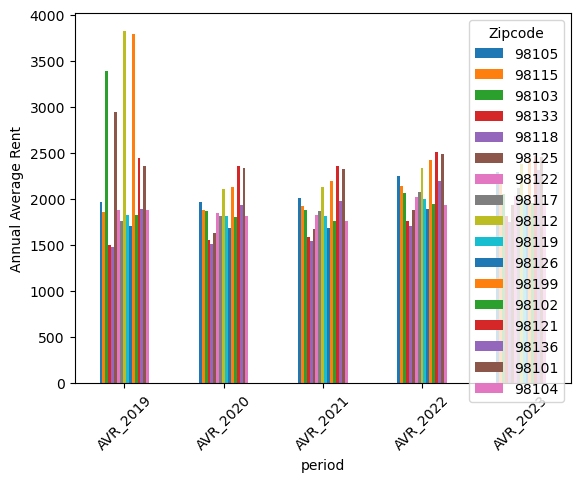

In [136]:
import matplotlib.pyplot as plt

# Define x-axis data
#x_axis_data = df_rent.columns

# Define specific columns to plot as y-axis data
y_axis_data = ['TOTAL_RENTALS_2019', 'AVR_2019', 'TOTAL_RENTALS_2020', 'AVR_2020', 'TOTAL_RENTALS_2021', 'AVR_2021', 'TOTAL_RENTALS_2022', 'AVR_2022', 'TOTAL_RENTAL_2023', 'AVR_2023']

# # Plotting
plt.figure(figsize=(30, 20))

plot = df4.plot(kind='bar')

# for index, row in df2.iterrows():
# #     # Extract y-axis data for the current Zipcode
# #     y_values = df_rent.loc[Zipcode, y_axis_data]
#       y_values = row
#       print(row)
# #     # Ensure that x_axis_data and y_values have the same length
# #     if len(x_axis_data) != len(y_values):
# #         continue  # Skip plotting if dimensions don't match
    
# #     # Plot the line for the current Zipcode with a non-underscore label
#      plt.plot(x_axis_data, y_values, label=str(Zipcode))  # Ensure Zipcode is converted to string

# # Add labels and legend
plt.ylabel('Annual Average Rent')
plt.xlabel('period')
# plt.title('Seattle Rental Data')
# plt.legend()
# # Rotate x-axis labels for better visibility
plt.xticks(rotation=45)